In [225]:
### Lending Case Study
### Author - Priyanka Singh

In [15]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
#Reading the dataset
loan_dataset = pd.read_csv('loan.csv')

C:\Users\hp\AppData\Local\Temp\ipykernel_2912\4161194845.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_dataset = pd.read_csv('loan.csv')


In [126]:
#Setting python to display all columns in the dataset and displaying the dataset
pd.set_option("display.max_columns",111)
print("max_columns value after the change : " + 
      str(pd.options.display.max_columns))
loan_dataset.head()

max_columns value after the change : 111


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [127]:
#Checking the data types of the column
print(loan_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


##Exploratory Data Analysis##

In [128]:
#Checking for duplicated rows in the loan dataset - If total count of the dataset matches with distinct count of 'Id' column- 
#then there is no duplicate. As 'Id' is level of the data
print(loan_dataset.duplicated(subset=None,keep = 'first').count())
print(loan_dataset[loan_dataset.duplicated(['id'])])


39717
Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_uti

The dataset passes the row-level duplicate check

In [129]:
#Checking the count of rows which are null
print(loan_dataset.isnull().all(axis = 1).sum())

0


There are 0 rows which are null

In [130]:
#Checking the count of columns which are null
print(loan_dataset.isnull().all(axis = 0).sum())

54


There are 54 columns which are null

In [131]:
#Checking top 5 rows
loan_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [132]:
#Finding and dropping columns which are entirely null and displaying it to verify the results
loan_dataset=loan_dataset.dropna(axis=1,how='all')
display(loan_dataset)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A

In [133]:
#Dropping columns which are customer behavior variables and have no impact to the analysis as they are generated post loan approval
loan_dataset = loan_dataset.drop(["application_type","collection_recovery_fee","delinq_2yrs","earliest_cr_line","inq_last_6mths","last_credit_pull_d",
                  "last_pymnt_amnt","last_pymnt_d","open_acc","out_prncp_inv","pub_rec","recoveries","revol_bal","revol_util","total_acc",
                  "total_pymnt_inv","total_rec_int","total_rec_late_fee","total_rec_prncp"], axis = 1)



In [134]:
#Displaying to check the column count
display(loan_dataset)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,initial_list_status,out_prncp,total_pymnt,next_pymnt_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,NaN,NaN,f,0.00,5863.155187,NaN,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,NaN,NaN,f,0.00,1008.710000,NaN,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,NaN,NaN,f,0.00,3005.666844,NaN,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,35.0,NaN,f,0.00,12231.890000,NaN,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,38.0,NaN,f,524.06,3513.330000,Jun-16,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0.0,0.0,f,0.00,2822.969293,NaN,NaN,1,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,5.0,0.0,f,0.00,9913.491822,NaN,NaN,1,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0.0,0.0,f,0.00,5272.161128,NaN,NaN,1,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0.0,0.0,f,0.00,5174.198551,NaN,NaN,1,0,NaN,0,NaN,NaN


In [135]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [136]:
#Data Manipulation
#Emp_length is an important variable as it will impact the analysis, suaully lending company or investers are more quick to lend 
#money with tenure less than 10 years, as the financial situation can change drastically over a period of more than 10 years
loan_dataset.emp_length.fillna('0',inplace=True)
loan_dataset['emp_length']=loan_dataset.emp_length.str.extract('(\d+)')
loan_dataset.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,initial_list_status,out_prncp,total_pymnt,next_pymnt_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,NaN,NaN,f,0.00,5863.155187,NaN,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,NaN,NaN,f,0.00,1008.710000,NaN,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,NaN,NaN,f,0.00,3005.666844,NaN,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,35.0,NaN,f,0.00,12231.890000,NaN,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,38.0,NaN,f,524.06,3513.330000,Jun-16,0.0,1,0,0.0,0,0.0,0.0


In [137]:
#Cleaning pub_rec_bankruptcies as it indicates the publicly available data on how many times the person has gone bankrupt
#Prior to cleaning pub_rec_bankruptcies
print('Prior to cleaning pub_rec_bankruptcies')
print(loan_dataset.pub_rec_bankruptcies.isnull().sum())

Prior to cleaning pub_rec_bankruptcies
697


In [138]:
# Replacing the 'Not Known' with NA values
loan_dataset.pub_rec_bankruptcies.fillna('Not Known',inplace=True)

print('Post cleaning pub_rec_bankruptcies')
print(loan_dataset.pub_rec_bankruptcies.isnull().sum())

Post cleaning pub_rec_bankruptcies
0


In [139]:
#Step for removing % symbol from interest rate column to be used in analysis further
loan_dataset['int_rate']=loan_dataset['int_rate'].str.rstrip('%')



In [141]:
#Modifying columns for further analysis 
columns_to_be_modified=['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan_dataset[columns_to_be_modified]=loan_dataset[columns_to_be_modified].apply(pd.to_numeric)

In [144]:
#Checking whether the changes have been done or not
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  39717 non-null  int64  
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

As the bried explained, we should not be considering current ones as they are not fully paid neither defaulted. Hence excluding the current ones in the next line of code.

In [145]:
loan_dataset = loan_dataset[loan_dataset.loan_status != "Current"]

In [148]:
print(loan_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  float64
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  38577 non-null  int64  
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

In [149]:
#To showcase how much% is fully paid and how much% is charged off
Perc_Split_Full_Charged_Off = (loan_dataset.loan_status.value_counts()*100)/len(loan_dataset)
print(Perc_Split_Full_Charged_Off)

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

In [152]:
#% split of loans across their purposeses
loan_reason_split = (loan_dataset.purpose.value_counts()*100)/len(loan_dataset)
print(loan_reason_split)

debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: purpose, dtype: float64


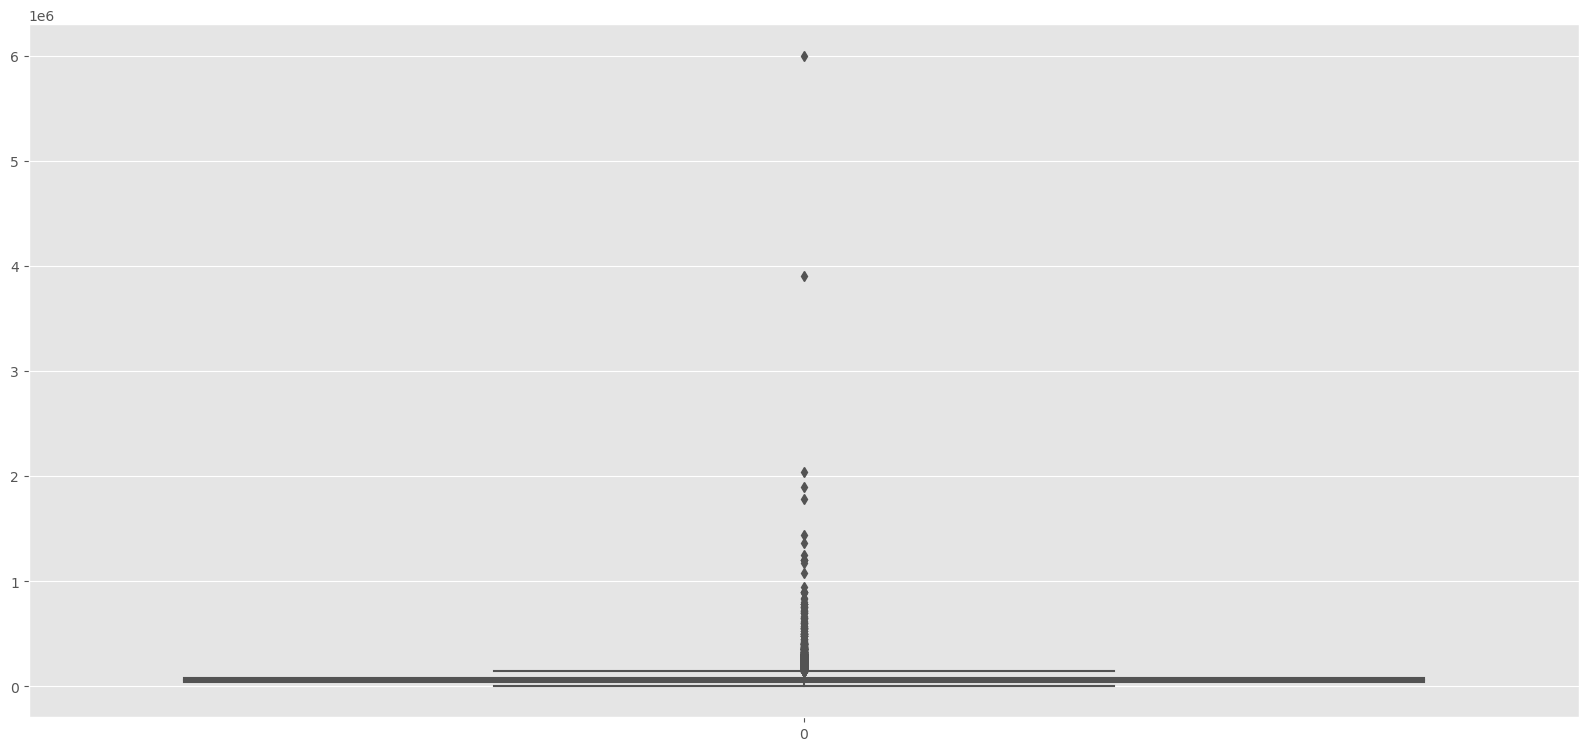

In [153]:
#Outlier identification and removal and creating Boxplot for Annual Income
plt.figure(figsize=(20,9))
with plt.style.context('ggplot'):
  sns.boxplot(loan_dataset.annual_inc)

In [156]:
#Checking outlier for annual income using quantile method
ann_inc_out_check = loan_dataset.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.99])
ann_inc_out_check

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.99    234144.0
Name: annual_inc, dtype: float64

Findings:-
There are outliers in the data and hence needs to be solved for. Considering 95% quantile as per the value obrained

In [158]:
# Basic stats with numeric Variables and removing outliers 

print('Prior to eliminating Outliers from Annual Income :\n')
print(loan_dataset['annual_inc'].describe(),'\n')
loan_dataset=loan_dataset[loan_dataset["annual_inc"]< loan_dataset["annual_inc"].quantile(0.95)]
print('Post removing outliers from Annual Income:\n')
print(loan_dataset["annual_inc"].describe())

Prior to eliminating Outliers from Annual Income :

count     36642.000000
mean      60829.831120
std       27717.831464
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77704.050000
max      140000.000000
Name: annual_inc, dtype: float64 

Post removing outliers from Annual Income:

count     34794.000000
mean      57329.812259
std       23739.902046
min        4000.000000
25%       39750.000000
50%       54996.000000
75%       74000.000000
max      116765.000000
Name: annual_inc, dtype: float64


In [161]:
#Check post outlier treatment
ann_inc_out_check = loan_dataset["annual_inc"].quantile([0.5, 0.75,0.90, 0.95, 0.99])
ann_inc_out_check

0.50     54996.00
0.75     74000.00
0.90     92000.00
0.95    100000.00
0.99    112406.52
Name: annual_inc, dtype: float64

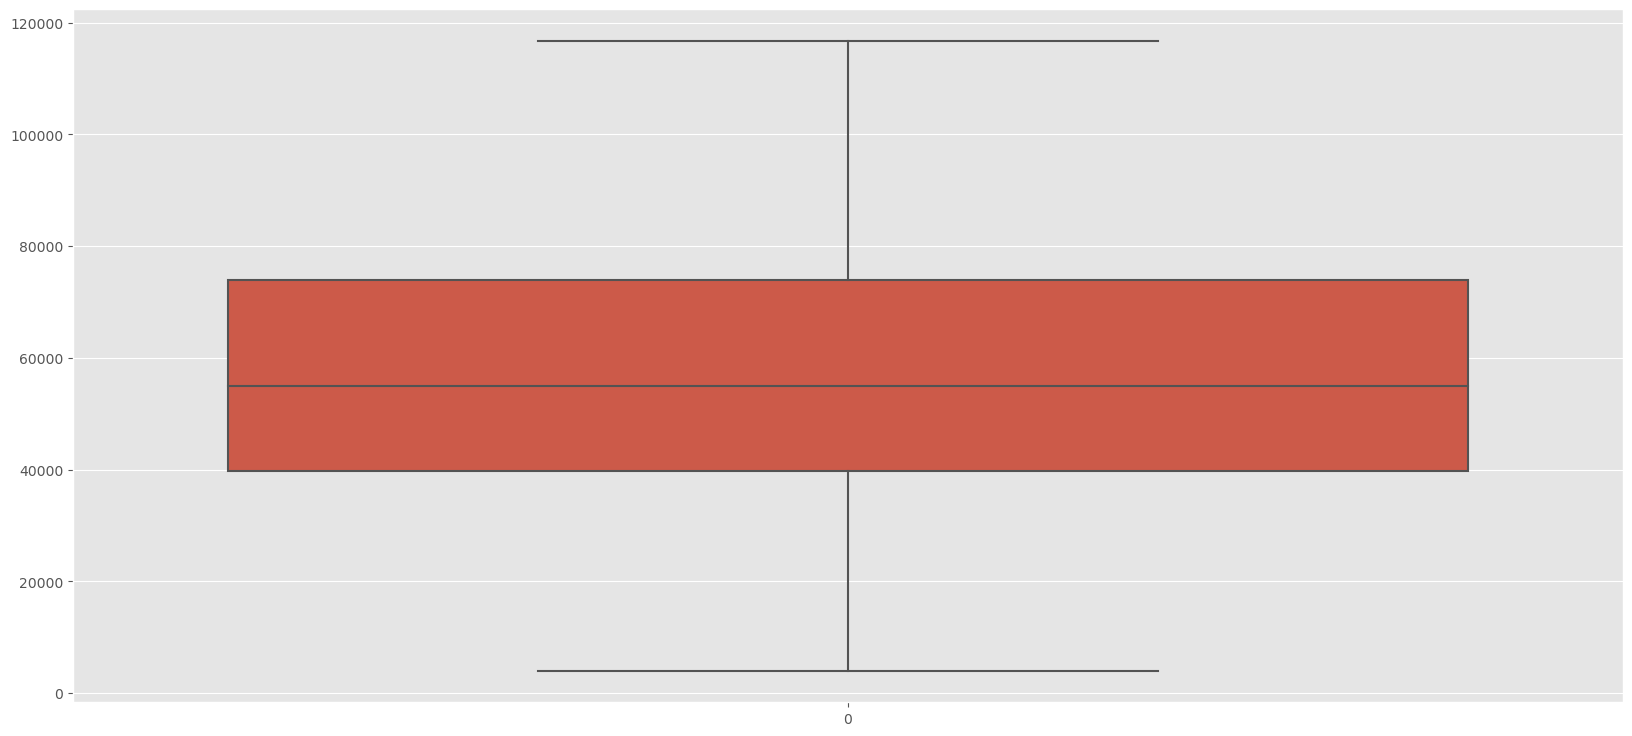

In [163]:
# Creating boxplot for Annual Income
plt.figure(figsize=(20,9))
with plt.style.context('ggplot'):
  sns.boxplot(loan_dataset.annual_inc)

Observations II -
The outliers have been removed that are above 95 percentile

In [164]:
#Obtaining numeric variables with describe for loan amount
loan_dataset['loan_amnt'].describe()

count    34794.000000
mean     10410.932919
std       6848.597912
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14400.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [165]:
loan_amt_out_check = loan_dataset["loan_amnt"].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
loan_amt_out_check

0.50     9000.0
0.75    14400.0
0.90    20000.0
0.95    25000.0
0.97    25000.0
0.98    28000.0
0.99    34000.0
Name: loan_amnt, dtype: float64

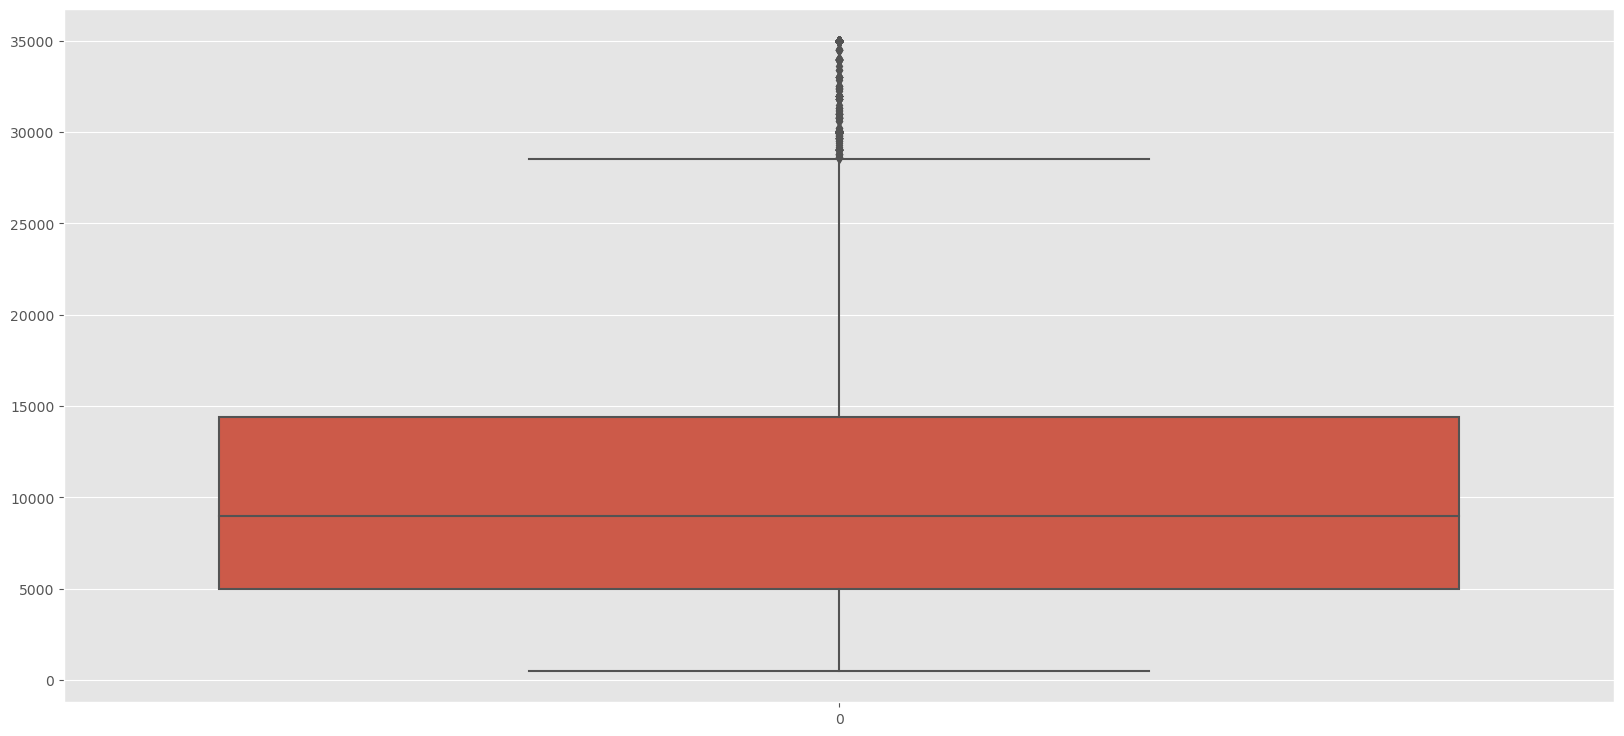

In [167]:
#Creating box Plot for loan amount
plt.figure(figsize=(20,9))
with plt.style.context('ggplot'):
  sns.boxplot(loan_dataset.loan_amnt)

Observations III - 
There are few values far from the distribution, but as the distribution is mostly continuous.So, there is no need to remove outliers for those.

In [168]:
#Obtaining numeric variables with describe for total payment
loan_dataset["total_pymnt"].describe()

count    34794.000000
mean     11123.844559
std       8150.511602
min          0.000000
25%       5290.991229
50%       9095.675506
75%      14960.697232
max      56199.439950
Name: total_pymnt, dtype: float64

In [169]:
total_pymnt_out_check = loan_dataset["total_pymnt"].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
total_pymnt_out_check

0.50     9095.675506
0.75    14960.697232
0.90    22284.175052
0.95    27709.776723
0.97    30705.060030
0.98    33086.717032
0.99    38046.273140
Name: total_pymnt, dtype: float64

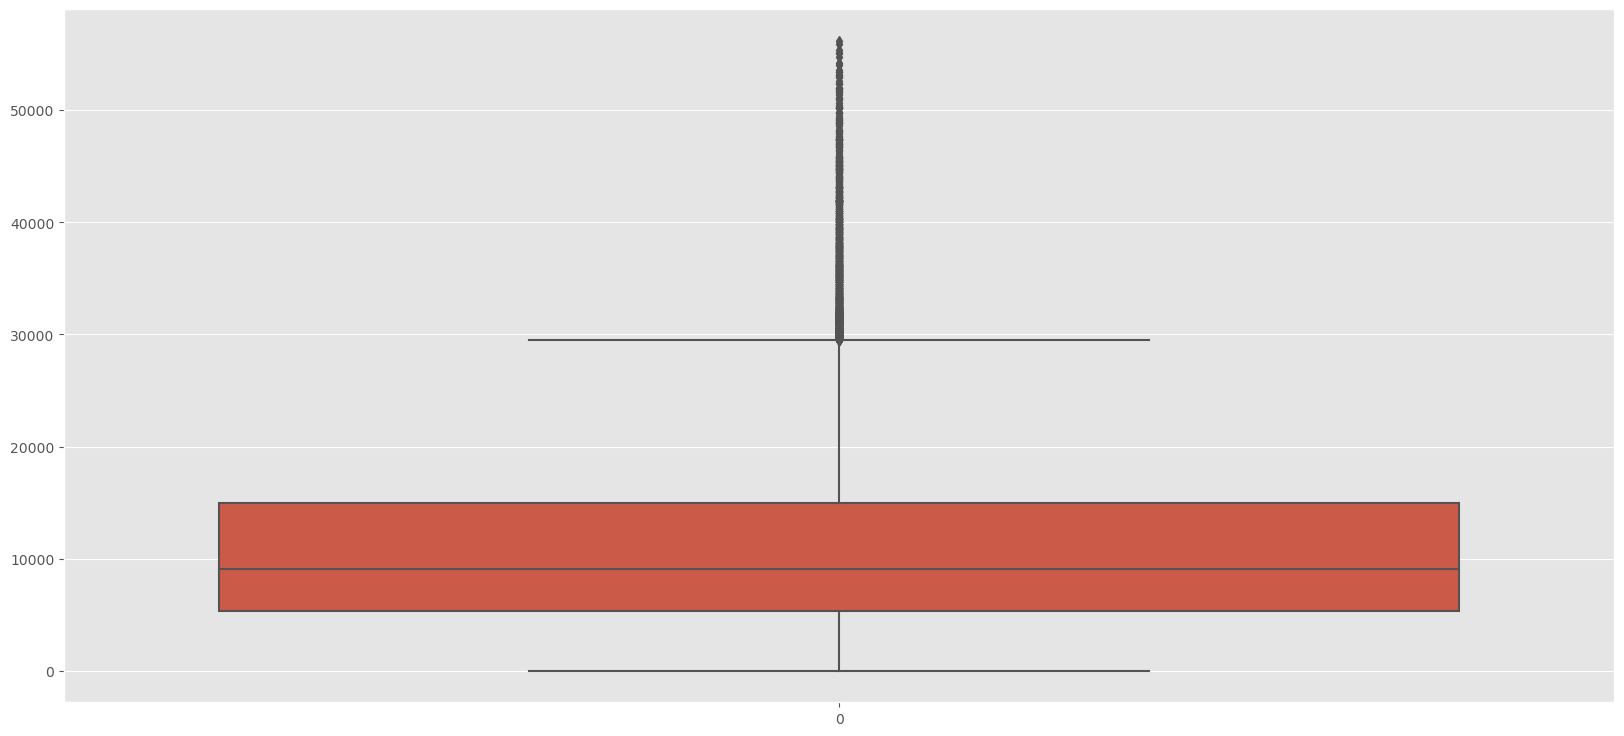

In [171]:
#Creating boxplot for Total Payment
plt.figure(figsize=(20,9))
with plt.style.context('ggplot'):
  sns.boxplot(loan_dataset.total_pymnt)

Observations IV -

There are some values far from the distribution, but as the distribution is mostly continuous. Hence, there is no need to remove outliers for those values.

In [172]:
#Statistics with Interest Rate
loan_dataset['int_rate'].describe()

count    34794.000000
mean        11.863218
std          3.645004
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

In [173]:
int_rate_out_check = loan_dataset["int_rate"].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
int_rate_out_check

0.50    11.71
0.75    14.27
0.90    16.77
0.95    18.25
0.97    19.03
0.98    19.74
0.99    20.89
Name: int_rate, dtype: float64

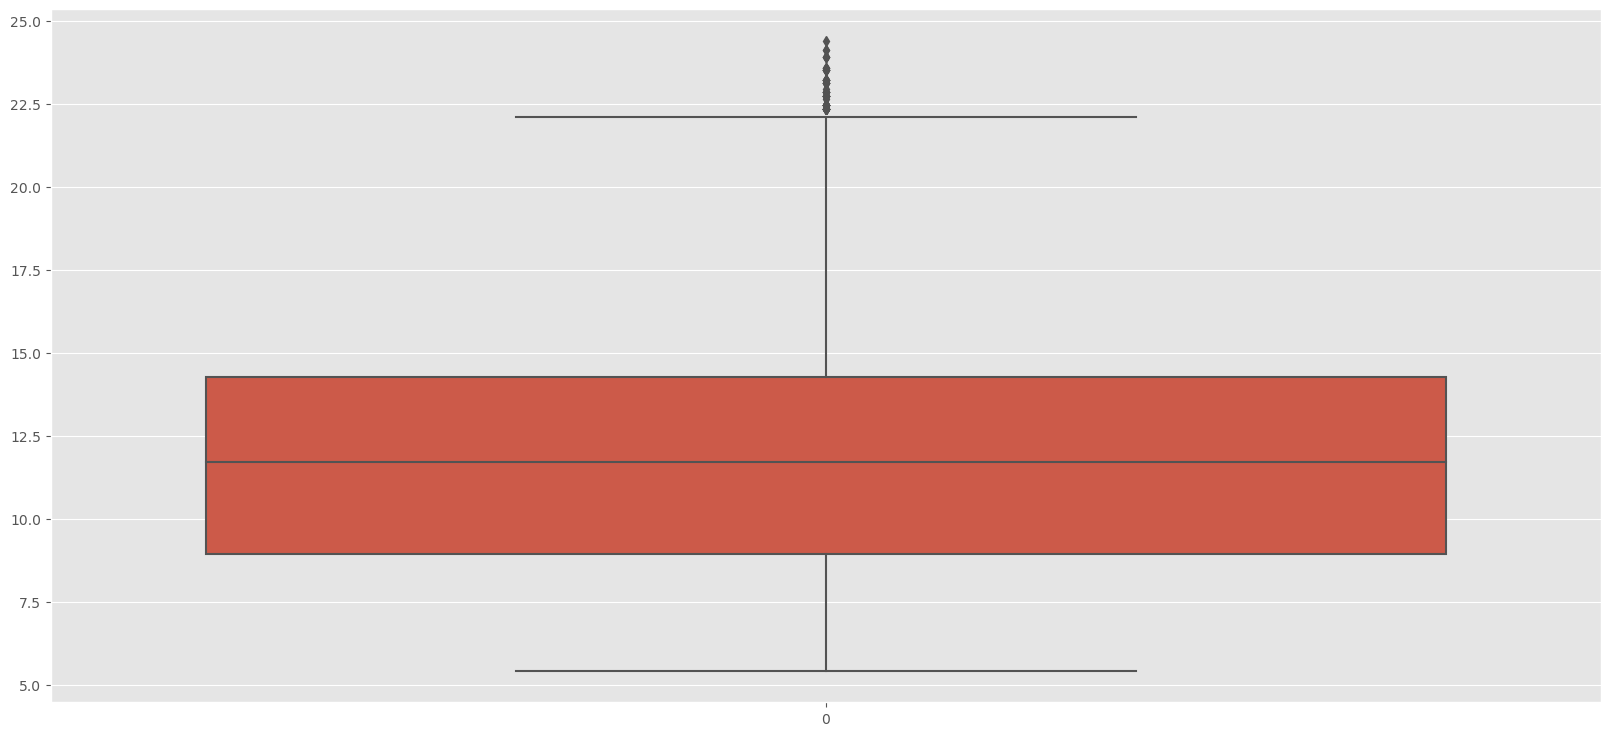

In [175]:
#Creating boxplot for Interest Rate
plt.figure(figsize=(20,9))
with plt.style.context('ggplot'):
  sns.boxplot(loan_dataset.int_rate)

Observations V - 
There are some values far from the distribution, but as the distribution is mostly continuous.Hence, there is no need to remove outliers for those.

In [177]:
#Feature Selection
#Removing unwanted data
column_tb_dropped =["initial_list_status","policy_code","pymnt_plan","installment"]
loan_dataset = loan_dataset.drop(labels=column_tb_dropped,axis=1)
print(loan_dataset.shape)
loan_dataset.isnull().sum()

(34794, 34)


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
grade                             0
sub_grade                         0
emp_title                      2083
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
url                               0
desc                          11259
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
mths_since_last_delinq        22552
mths_since_last_record        32244
out_prncp                         0
total_pymnt                       0
next_pymnt_d                

In [180]:
#Creating Bins for further analysis and checking whether the changes are getting reflected or not
#Creating categories for loan amounts for bivariate analysis to be carried out later in the notebook
loan_dataset['loan_amnt_categories']=pd.cut(loan_dataset['loan_amnt'],[0,7000,14000,21000,28000,35000],labels=['0-7000','7000-14000','14000-21000','21000-28000','28000+'])

#Creating categories for annual incomes for bivariate analysis to be carried out later in the notebook
loan_dataset['annual_inc_categories']=pd.cut(loan_dataset['annual_inc'],[0,20000,40000,60000,80000,1000000],labels=['0-20000','20000-40000','40000-60000','60000-80000','80000+'])

#Creating categories for interest rates for bivariate analysis to be carried out later in the notebook
loan_dataset['interest_rate_categories']=pd.cut(loan_dataset['int_rate'],[0,10,12.5,16,20],labels=['0-10','10-13','12.5-16','16+'])

#Creating dti into buckets for bivariate analysis to be carried out later in the notebook
loan_dataset['dti_categories']=pd.cut(loan_dataset['dti'],[0,5,10,15,20,25],labels=['0-5','5-10','10-15','15-20','25+'])

print(loan_dataset.shape)
loan_dataset.head(5)

(34794, 38)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,out_prncp,total_pymnt,next_pymnt_d,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_amnt_categories,annual_inc_categories,interest_rate_categories,dti_categories
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,NaN,NaN,0.0,5863.155187,NaN,0.0,0,0.0,0,0.0,0.0,0-7000,20000-40000,10-13,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,NaN,NaN,0.0,1008.710000,NaN,0.0,0,0.0,0,0.0,0.0,0-7000,20000-40000,12.5-16,0-5
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,NaN,NaN,0.0,3005.666844,NaN,0.0,0,0.0,0,0.0,0.0,0-7000,0-20000,12.5-16,5-10
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,35.0,NaN,0.0,12231.890000,NaN,0.0,0,0.0,0,0.0,0.0,7000-14000,40000-60000,12.5-16,15-20
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,NaN,NaN,0.0,5632.210000,NaN,0.0,0,0.0,0,0.0,0.0,0-7000,20000-40000,0-10,10-15


Univariate Analysis

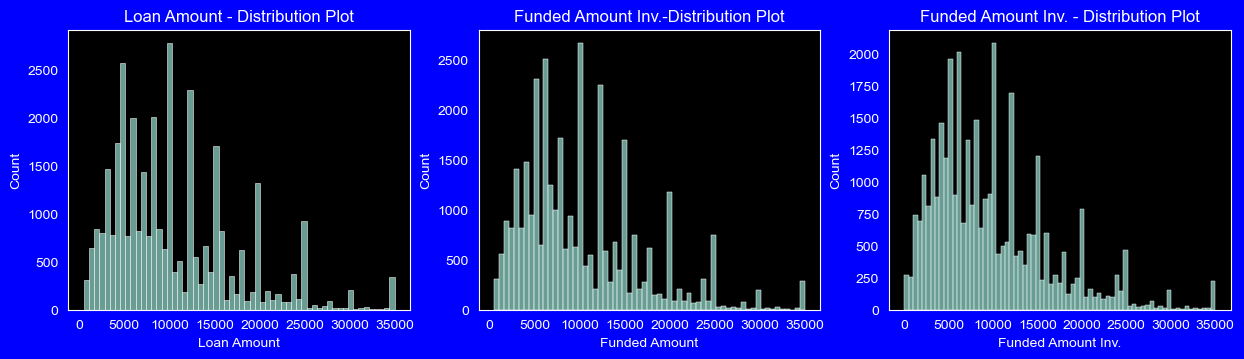

In [186]:
# Distribution of Loan amounts using distribution plot
plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
with plt.style.context('dark_background'):

  #subplot1
  plt.subplot(2,3,1)
  ax=sns.histplot(loan_dataset['loan_amnt'])
  ax.set(title='Loan Amount - Distribution Plot',xlabel='Loan Amount')


  #subplot2
  plt.subplot(2,3,2)
  ax=sns.histplot(loan_dataset['funded_amnt'])
  ax.set(title='Funded Amount Inv.-Distribution Plot',xlabel='Funded Amount')
    
  #subplot3

  plt.subplot(2, 3, 3)
  ax = sns.histplot(loan_dataset['funded_amnt_inv'])
  ax.set(title='Funded Amount Inv. - Distribution Plot',xlabel='Funded Amount Inv.')

  plt.show()

Observations - Distribution of amounts pertaining to all three (Loan, Funded and Funded Amount Inv) looks very much similar.

In [187]:
#Univariate Analysis for Loan Amount Variable
## Extracting month and year
df_month_year = loan_dataset['issue_d'].str.partition("-", True)     
loan_dataset['issue_month']=df_month_year[0]                       
loan_dataset['issue_year']='20' + df_month_year[2]

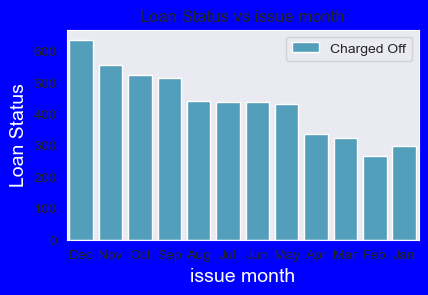

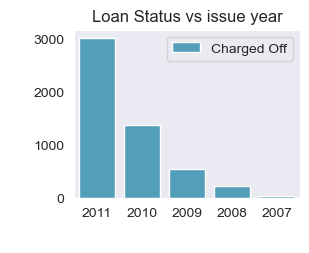

In [188]:
#Plotting Loan status vs issue month - performing univariate analysis
plt.figure(figsize=(10,6),facecolor='b')

plt.subplot(221)
ax = sns.countplot(x='issue_month', data=loan_dataset[loan_dataset['loan_status']=='Charged Off'],hue='loan_status',palette='GnBu_d')
ax.set(title='Loan Status vs issue month')
ax.set_xlabel('issue month',fontsize=14,color = 'w')
ax.set_ylabel('Loan Status',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

plt.subplot(222)
ax = sns.countplot(x='issue_year', data=loan_dataset[loan_dataset['loan_status']=='Charged Off'],hue='loan_status',palette='GnBu_d')
ax.set(title='Loan Status vs issue year')
ax.set_xlabel('issue year',fontsize=14,color = 'w')
ax.set_ylabel('Loan Status',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_2912\2016270366.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(loan_dataset['loan_amnt'],rug=True)


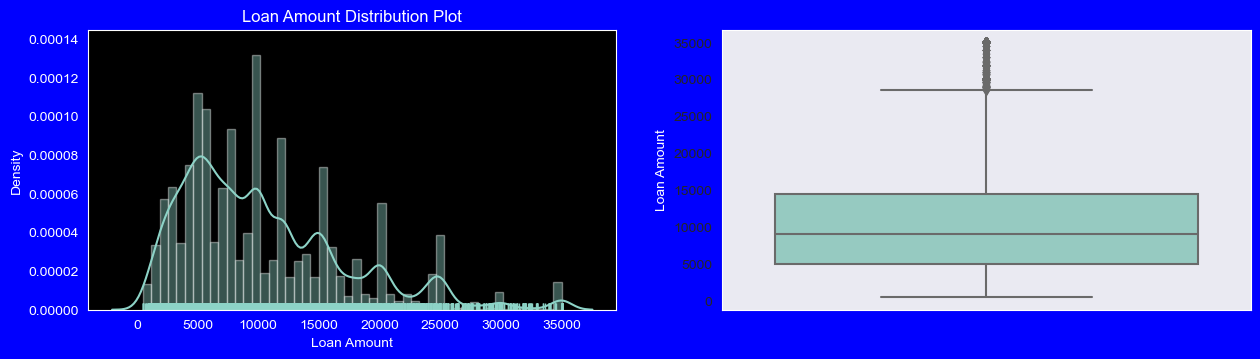

In [190]:
#Plotting loan amount against density, both distritbution plot and box plot show the same result
with plt.style.context('dark_background'):
  plt.figure(figsize=(15,8),facecolor='b')
  
  #Subplot 1

  plt.subplot(2,2,1)
  ax=sns.distplot(loan_dataset['loan_amnt'],rug=True)
  ax.set(title='Loan Amount Distribution Plot')
  ax.set_xlabel('Loan Amount', fontsize=10,color='w')

  #Subplot 2
  sns.set_style("dark")

  plt.subplot(2,2,2)
  ax=sns.boxplot(y=loan_dataset['loan_amnt'])
  ax.set_ylabel('Loan Amount', fontsize=10,color='w')
  plt.show()

Observations - Majority of the loan amounts are in the range 5000-15000 with minimum outliers

C:\Users\hp\AppData\Local\Temp\ipykernel_2912\1512081017.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(loan_dataset['int_rate'],rug=True)


Text(0, 0.5, 'Interest Rate')

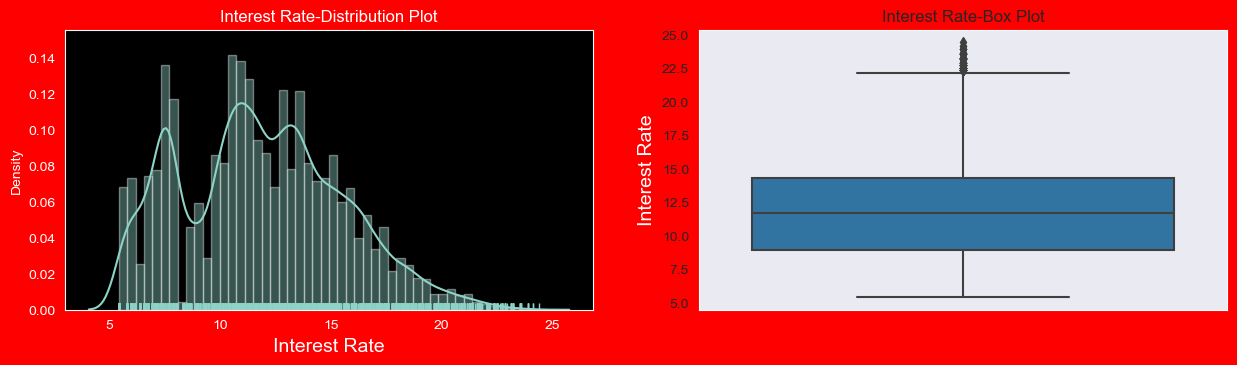

In [191]:
##Plotting interest rate against density, both distritbution plot and box plot show the same result
plt.figure(figsize=(15,8),facecolor='r')

with plt.style.context('dark_background'):
  #subplot 1

  plt.subplot(2,2,1)
  ax=sns.distplot(loan_dataset['int_rate'],rug=True)
  ax.set(title='Interest Rate-Distribution Plot')
  ax.set_xlabel('Interest Rate',fontsize=14,color='w')

 #subplot 2

 sns.set_style("dark")
 plt.subplot(2,2,2)
 ax=sns.boxplot(y=loan_dataset['int_rate'])
 ax.set(title='Interest Rate-Box Plot')
 ax.set_ylabel('Interest Rate',fontsize=14,color='w')

Observations - Majority of the interest rates are in the range 10%-15%

C:\Users\hp\AppData\Local\Temp\ipykernel_2912\2932204675.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(loan_dataset['annual_inc'],rug=True)


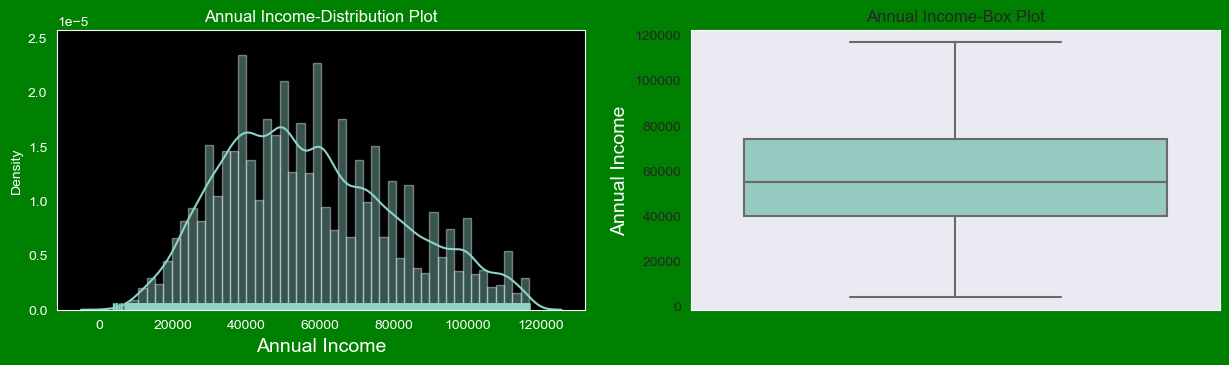

In [194]:
#Annual Income - Univariate Analysis and plotting the same. Both distritbution plot and box plot show the same result
plt.figure(figsize=(15,8),facecolor='g')

with plt.style.context('dark_background'):
  #Subplot1
  plt.subplot(2,2,1)
  ax=sns.distplot(loan_dataset['annual_inc'],rug=True)
  ax.set(title='Annual Income-Distribution Plot')
  ax.set_xlabel('Annual Income',fontsize=14,color='w')

 #Subplot2
  sns.set_style("dark")
  plt.subplot(2,2,2)
  ax=sns.boxplot(y=loan_dataset['annual_inc'])
  ax.set(title='Annual Income-Box Plot')
  ax.set_ylabel('Annual Income',fontsize=14,color='w')

Observations - Most of the Annual Income are in the range 25000-75000

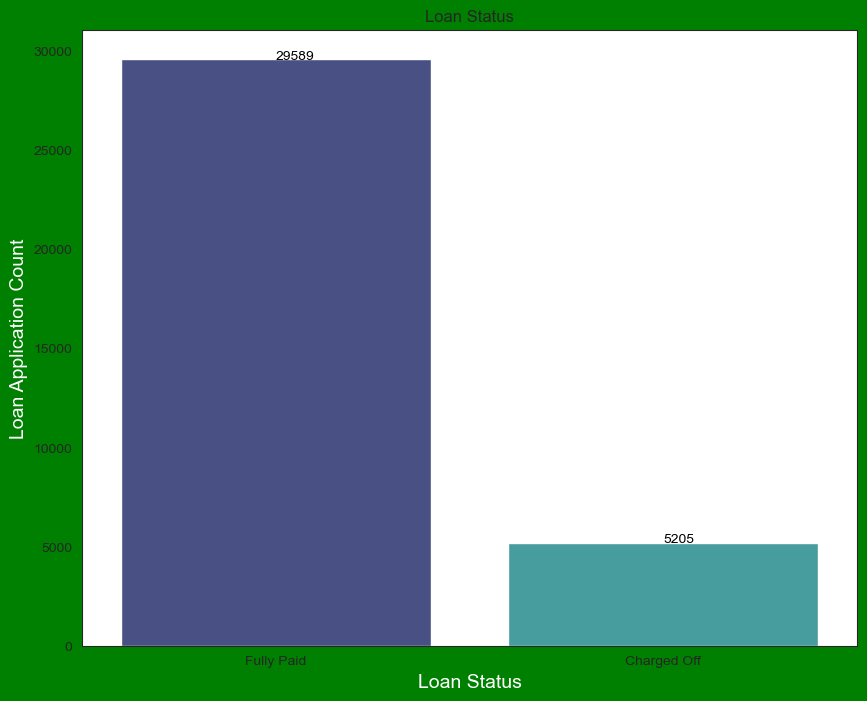

In [195]:
#Univariate Analysis - Unordered Categorical Variables - Loan Status
plt.figure(figsize=(10,8),facecolor='g')
sns.set_style("white")
ax=sns.countplot(x="loan_status",data=loan_dataset,palette='mako')
ax.set(title='Loan Status')
ax.set_xlabel('Loan Status',fontsize=14,color='w')
ax.set_ylabel('Loan Application Count',fontsize=14,color='w')

s=loan_dataset['loan_status'].value_counts()
for i,v in s.reset_index().iterrows():
  ax.text(i,v.loan_status+0.3,v.loan_status,color='k')

Observations - The following plot shows that around 14% loans were charged off out of the total loans issued

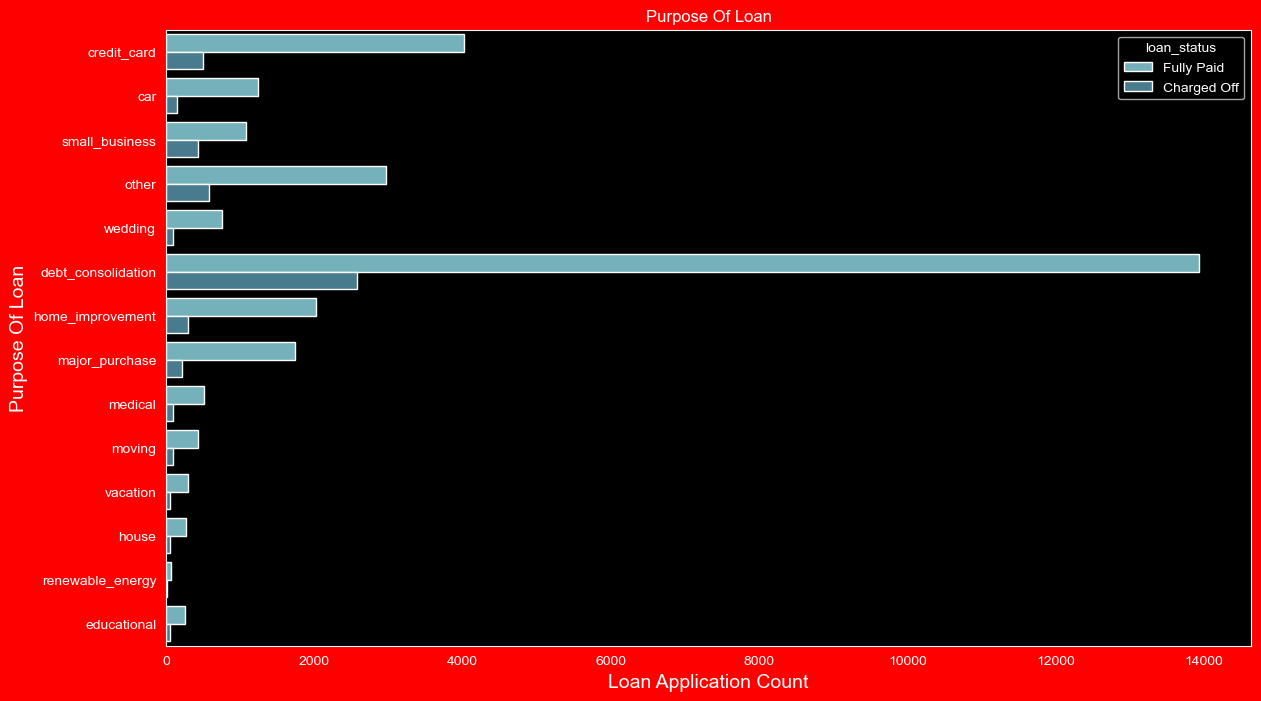

In [196]:
#Univariate Analysis - Unordered Categorical Variables - Purpose of Loan
plt.figure(figsize=(14,8),facecolor='r')
sns.set_style("dark")
with plt.style.context('dark_background'):
  ax=sns.countplot(y="purpose",data=loan_dataset,hue='loan_status',palette='GnBu_d')
  ax.set(title='Purpose Of Loan')
  ax.set_ylabel('Purpose Of Loan',fontsize=14,color='w')
  ax.set_xlabel('Loan Application Count',fontsize=14,color='w')
  plt.show()

Observations - The Count Plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill. Number of charged off count is also high too for these loans.

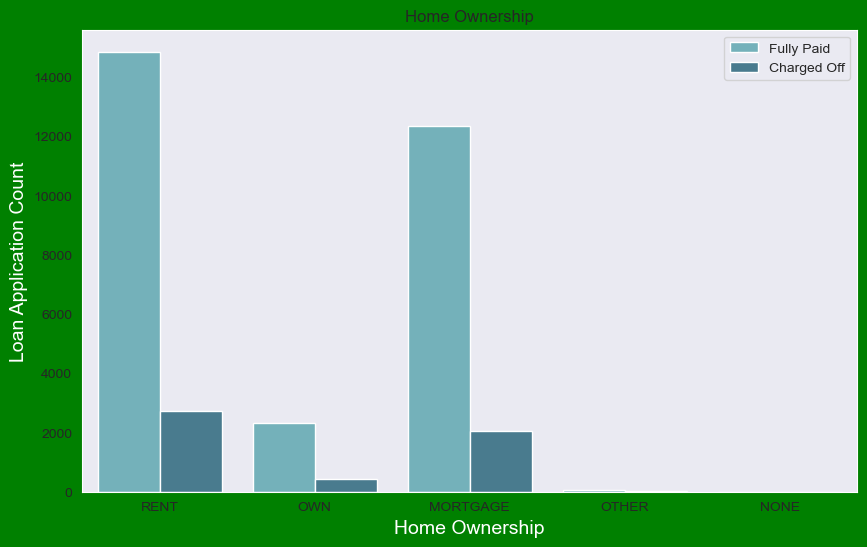

In [197]:
#Univariate Analysis - Unordered Categorical Variable - Home Ownership
plt.figure(figsize=(10,6),facecolor='g')
ax=sns.countplot(x="home_ownership",data=loan_dataset,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1,1))
ax.set(title='Home Ownership')
ax.set_xlabel('Home Ownership',fontsize=14,color='w')
ax.set_ylabel('Loan Application Count',fontsize=14,color='w')
plt.show()

Observations -
The Count plot shows that most of them living in rented home or mortgazed their home.
Applicant numbers are high from these categories so charged off is high too.

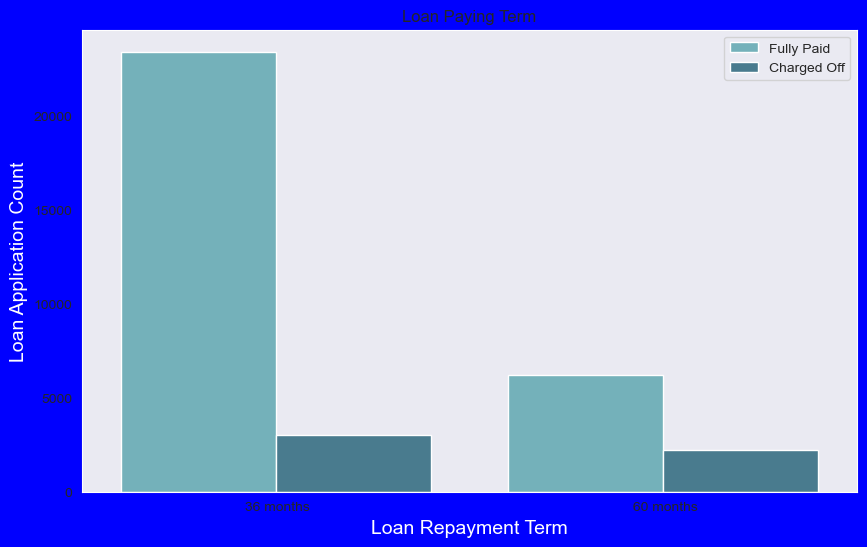

In [198]:
#Univariate analysis- Loan Paying Term
plt.figure(figsize=(10,6),facecolor='b')
ax=sns.countplot(x="term",data=loan_dataset,hue='loan_status',palette='GnBu_d')
ax.set(title='Loan Paying Term')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

Observations -
Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting
charged off as compared to applicants who had taken loan for 36 months.

Bivariate Analysis


In [200]:
#Correlation Analysis-Bivariate Matrix
loan_correlation=loan_dataset.corr()
loan_correlation


C:\Users\hp\AppData\Local\Temp\ipykernel_2912\836178593.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_correlation=loan_dataset.corr()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,emp_length,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,out_prncp,total_pymnt,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
id,1.000000,0.993622,0.113729,0.124942,0.228398,0.049439,0.094223,0.035617,0.096267,0.115675,0.696197,NaN,0.099697,NaN,NaN,NaN,NaN,NaN
member_id,0.993622,1.000000,0.113481,0.123902,0.238488,0.046189,0.097737,0.036537,0.097159,0.121717,0.714144,NaN,0.101048,NaN,NaN,NaN,NaN,NaN
loan_amnt,0.113729,0.113481,1.000000,0.982261,0.936088,0.283147,0.157574,0.393921,0.102003,0.029738,0.001353,NaN,0.871638,NaN,NaN,NaN,NaN,NaN
funded_amnt,0.124942,0.123902,0.982261,1.000000,0.953811,0.289135,0.156984,0.390923,0.101006,0.030068,-0.008302,NaN,0.888165,NaN,NaN,NaN,NaN,NaN
funded_amnt_inv,0.228398,0.238488,0.936088,0.953811,1.000000,0.282716,0.165855,0.373004,0.108636,0.088015,0.438730,NaN,0.863634,NaN,NaN,NaN,NaN,NaN
int_rate,0.049439,0.046189,0.283147,0.289135,0.282716,1.000000,0.008397,0.046231,0.106781,-0.049228,0.310790,NaN,0.269371,NaN,NaN,NaN,NaN,NaN
emp_length,0.094223,0.097737,0.157574,0.156984,0.165855,0.008397,1.000000,0.224709,0.060325,0.049621,0.194520,NaN,0.139507,NaN,NaN,NaN,NaN,NaN
annual_inc,0.035617,0.036537,0.393921,0.390923,0.373004,0.046231,0.224709,1.000000,-0.048269,0.020289,0.065940,NaN,0.369878,NaN,NaN,NaN,NaN,NaN
dti,0.096267,0.097159,0.102003,0.101006,0.108636,0.106781,0.060325,-0.048269,1.000000,0.064905,0.172402,NaN,0.096675,NaN,NaN,NaN,NaN,NaN
mths_since_last_delinq,0.115675,0.121717,0.029738,0.030068,0.088015,-0.049228,0.049621,0.020289,0.064905,1.000000,0.485054,NaN,0.025201,NaN,NaN,NaN,NaN,NaN


Observations -

Annual Income to Debt To Income Ratio i.e. dti are negatively correlated
Loan Amount,Investor Amount and Funding Amount are strongly correlated
Positive correlation between Annual Income and employment years
Positive correlation between annual income and funded amount that means people with high income gets high funded amount
Positive correlation between annual income and total payment

In [203]:
##Bivariate Analysis - Section II
##Analyze the loan status against important columns which might have an impact on charged off loans.

#Annual income VS Charged Off Loans
inc_range_vs_loan = loan_dataset.groupby(['annual_inc_categories', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_categories,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,943,1180,0.200847
1,20000-40000,1514,7004,8518,0.177741
2,40000-60000,1729,9534,11263,0.153511
3,60000-80000,1024,6597,7621,0.134366
4,80000+,701,5511,6212,0.112846


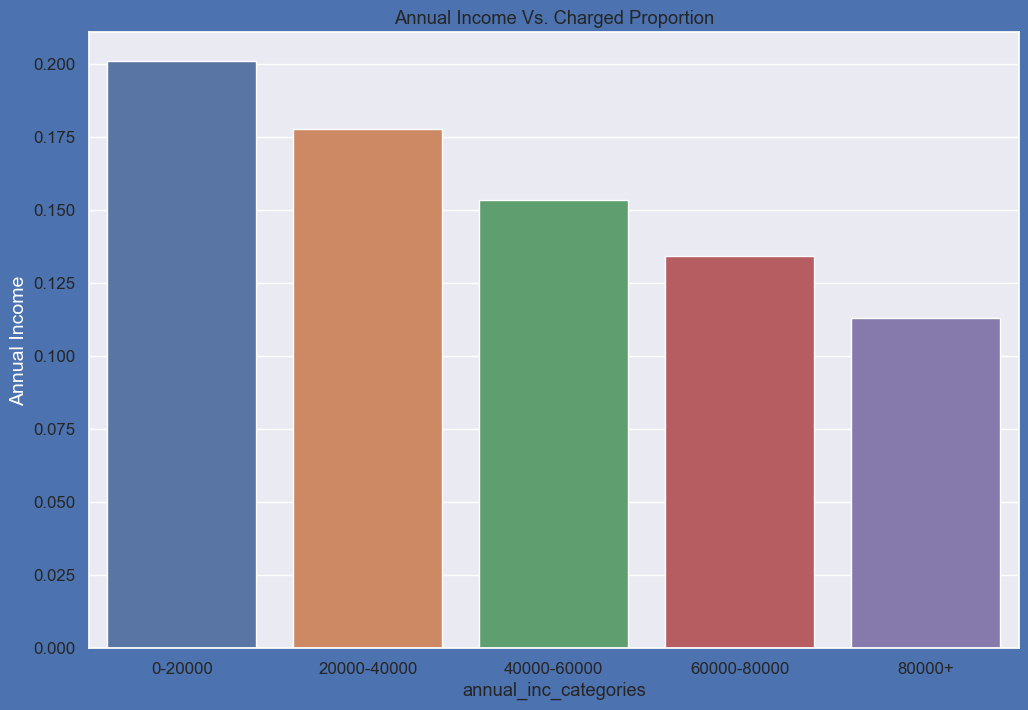

In [204]:
#Creating barplots on above calculated data
fig,ax1=plt.subplots(figsize=(12,8),facecolor='b')
ax1.set(title='Annual Income Vs. Charged Proportion')
ax1=sns.barplot(x='annual_inc_categories',y='Chargedoff_Proportion',data=inc_range_vs_loan)
ax.set_xlabel('Charged Off Proportion',fontsize=14,color='w')
ax1.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

Observations -
Income range 80000+ has less chances of charged off.
Income range 0-20000 has high chances of charged off.
Notice that with increase in annual income charged off proportion got decreased. So, they are inversely proportional.

In [205]:
#Bivariate Analysis for purpose of Loan Vs Charged Off Proportion
purpose_vs_loan = loan_dataset.groupby(['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total']=purpose_vs_loan['Charged Off']+purpose_vs_loan['Fully Paid']
purpose_vs_loan['ChargedOff_Proportion']=purpose_vs_loan['Charged Off']/purpose_vs_loan['Total']
purpose_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,ChargedOff_Proportion
11,small_business,436,1081,1517,0.287409
10,renewable_energy,18,71,89,0.202247
3,educational,53,252,305,0.173770
8,moving,89,428,517,0.172147
9,other,581,2969,3550,0.163662
7,medical,99,512,611,0.162029
5,house,50,269,319,0.156740
2,debt_consolidation,2579,13939,16518,0.156133
12,vacation,51,301,352,0.144886
4,home_improvement,301,2020,2321,0.129685


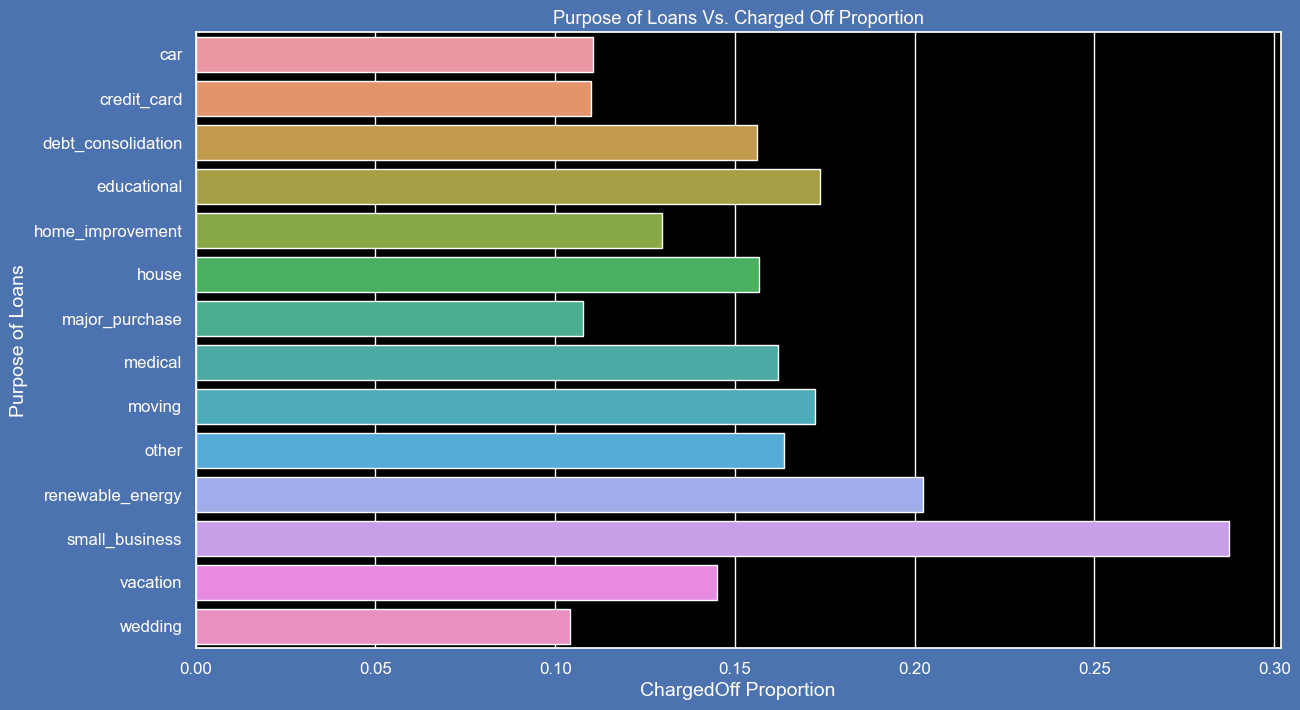

In [206]:
#Creating bar Charts from above data

with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(14,8),facecolor='b')
  ax1.set(title='Purpose of Loans Vs. Charged Off Proportion')
  ax1=sns.barplot(y='purpose',x='ChargedOff_Proportion',data=purpose_vs_loan)
  ax1.set_ylabel('Purpose of Loans',fontsize=14,color='w')
  ax1.set_xlabel('ChargedOff Proportion',fontsize=14,color='w')

Observations -
Small Business applicants have high chances of getting charged off.
Renewable_energy where chanrged off proportion is better as compare to other categories.

In [207]:
#Bivariate analysis of grade against Charged Off Proportion
grade_vs_loan=loan_dataset.groupby(['grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid']
grade_vs_loan['ChargedOff_Proportion']=grade_vs_loan['Charged Off']/grade_vs_loan['Total']
grade_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,ChargedOff_Proportion
6,G,89,140,229,0.388646
5,F,269,542,811,0.331689
4,E,622,1646,2268,0.274250
3,D,1028,3550,4578,0.224552
2,C,1281,5857,7138,0.179462
1,B,1338,9259,10597,0.126262
0,A,578,8595,9173,0.063011


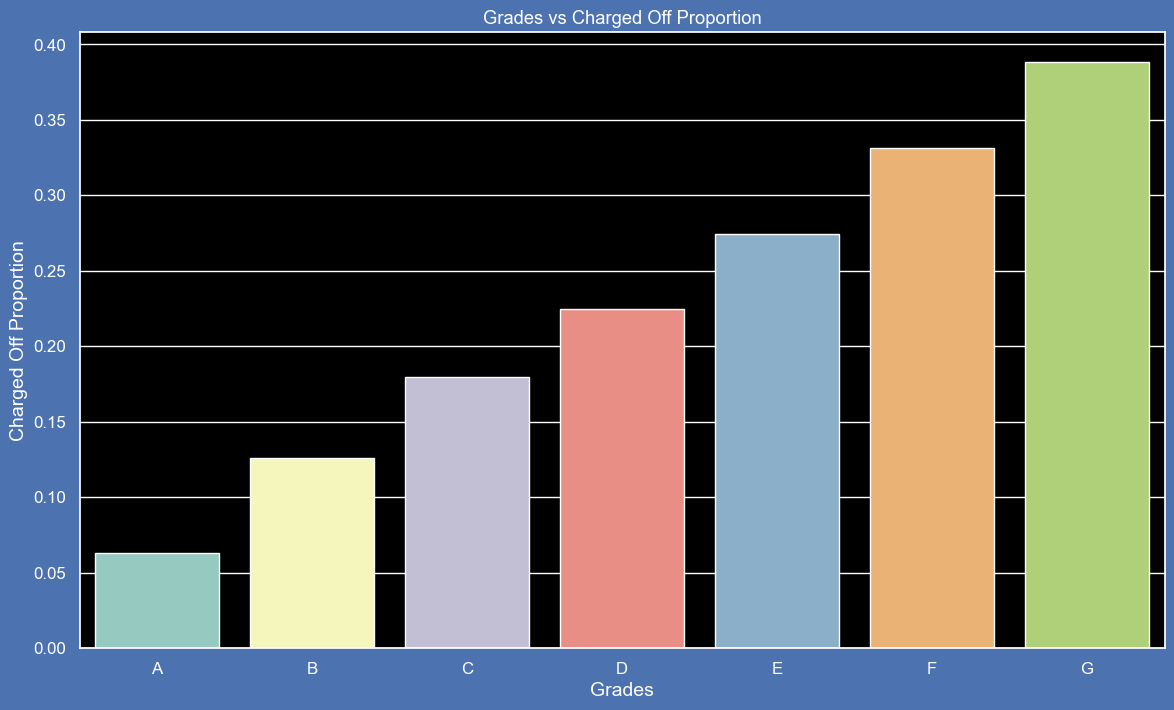

In [208]:
#Creating Bar Charts for above data

with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(14,8),facecolor='b')
  ax1.set(title='Grades vs Charged Off Proportion')
  ax1=sns.barplot(x='grade',y='ChargedOff_Proportion',data=grade_vs_loan)
  ax1.set_xlabel('Grades',fontsize=14,color='w')
  ax1.set_ylabel('Charged Off Proportion',fontsize=14,color='w')

Observations -
Grade A has least chances of getting charged off
Grade F and Grade G have high chances of getting charged off
Chances of getting charged off is increasing with grades moving from A to G


In [209]:
#Bivariate Analysis on sub grade against Charged Off Proportion
grade_vs_loan=loan_dataset.groupby(['sub_grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total']=grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid']
grade_vs_loan['ChargedOff_Proportion']=grade_vs_loan['Charged Off']/grade_vs_loan['Total']
grade_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,sub_grade,Charged Off,Fully Paid,Total,ChargedOff_Proportion
32,G3,19,17,36,0.527778
29,F5,47,44,91,0.516484
31,G2,25,36,61,0.409836
34,G5,8,13,21,0.380952
30,G1,28,48,76,0.368421
28,F4,41,88,129,0.317829
26,F2,61,133,194,0.314433
27,F3,44,100,144,0.305556
23,E4,110,253,363,0.303030
25,F1,76,177,253,0.300395


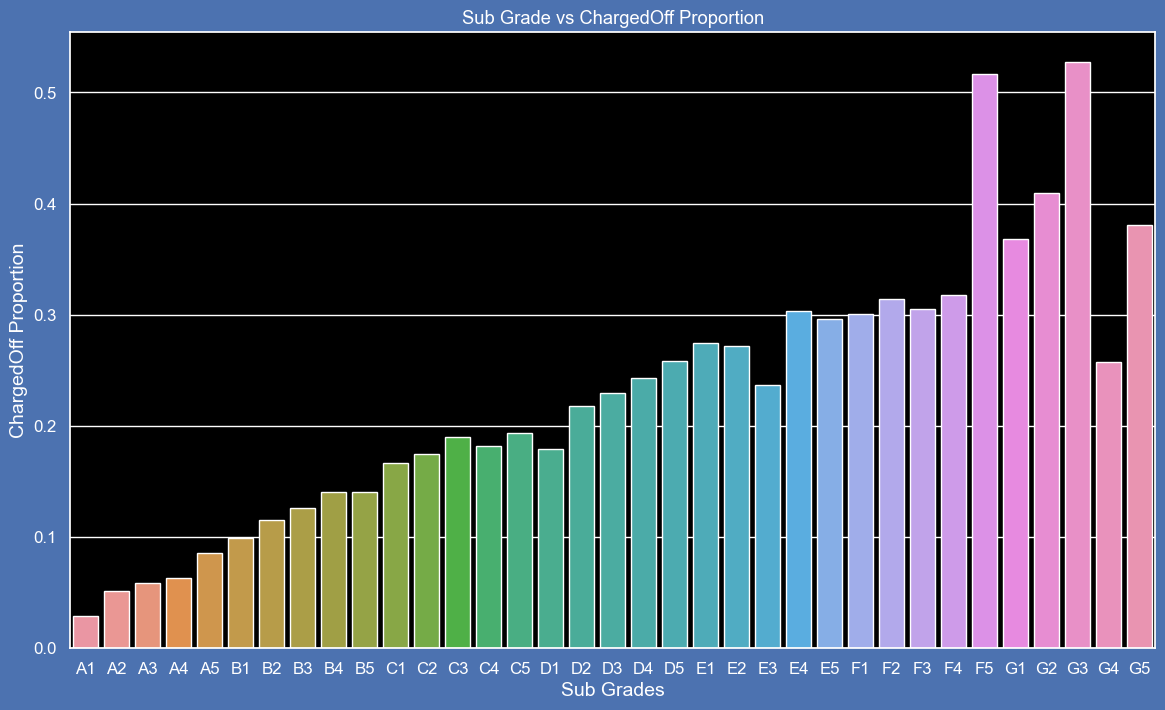

In [210]:
#Creating bar Plot from above analysis
with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(14,8),facecolor='b')
  ax1.set(title='Sub Grade vs ChargedOff Proportion')
  ax1=sns.barplot(x='sub_grade',y='ChargedOff_Proportion',data=grade_vs_loan)
  ax1.set_xlabel('Sub Grades',fontsize=14,color='w')
  ax1.set_ylabel('ChargedOff Proportion',fontsize=14,color='w')

Observations -
Sub Grade A has least chances of getting charged off
Sub Grade F and Sub Grade G have high chances of getting charged off
Chances of getting charged off is increasing with Subgrades moving from A to G

In [211]:
#Bivariate analysis on interest rate against
interest_vs_loan = loan_dataset.groupby(['interest_rate_categories','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Fully Paid']
interest_vs_loan['ChargedOff_Proportion'] = interest_vs_loan['Charged Off']/interest_vs_loan['Total']
interest_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,interest_rate_categories,Charged Off,Fully Paid,Total,ChargedOff_Proportion
3,16+,1131,2899,4030,0.280645
2,12.5-16,1871,8524,10395,0.179990
1,10-13,1161,7347,8508,0.136460
0,0-10,793,10465,11258,0.070439


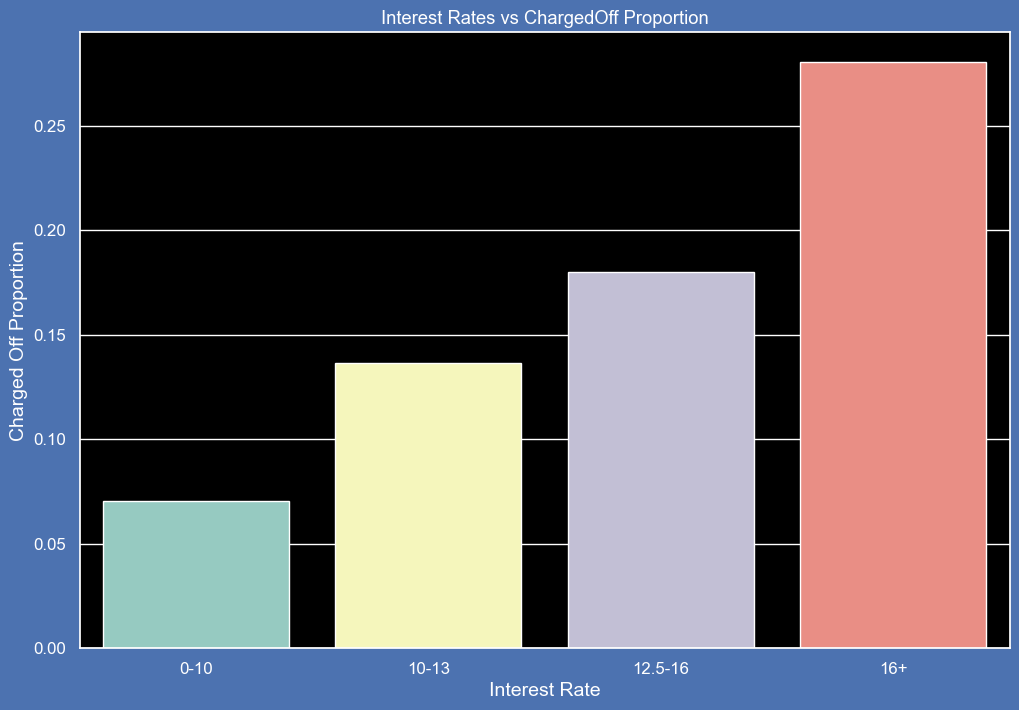

In [212]:
#Creating bar chart for above analysis

with plt.style.context('dark_background'):
  fig1,ax1=plt.subplots(figsize=(12,8),facecolor='b')
  ax1.set(title='Interest Rates vs ChargedOff Proportion')
  ax1=sns.barplot(x='interest_rate_categories',y='ChargedOff_Proportion',data=interest_vs_loan)
  ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
  ax1.set_ylabel('Charged Off Proportion',fontsize=14,color='w')


Observations -
Interest Rates which are less than 10% have very less chances of charged off.
Interest Rates greater than 16
Charged Off Proportion increases with higher interest rates

In [213]:
#Bivariate analysis on employment length vs Charged Off Proportion
emplen_vs_loan = loan_dataset.groupby(['emp_length','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Fully Paid']
emplen_vs_loan['ChargedOff_Proportion'] = emplen_vs_loan['Charged Off']/emplen_vs_loan['Total']
emplen_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,ChargedOff_Proportion
0,0,225,775,1000,0.225000
10,10,1199,6097,7296,0.164337
7,7,241,1327,1568,0.153699
1,1,1031,6022,7053,0.146179
5,5,423,2490,2913,0.145211
8,8,181,1082,1263,0.143310
6,6,283,1695,1978,0.143074
3,3,518,3120,3638,0.142386
4,4,430,2626,3056,0.140707
2,2,531,3412,3943,0.134669


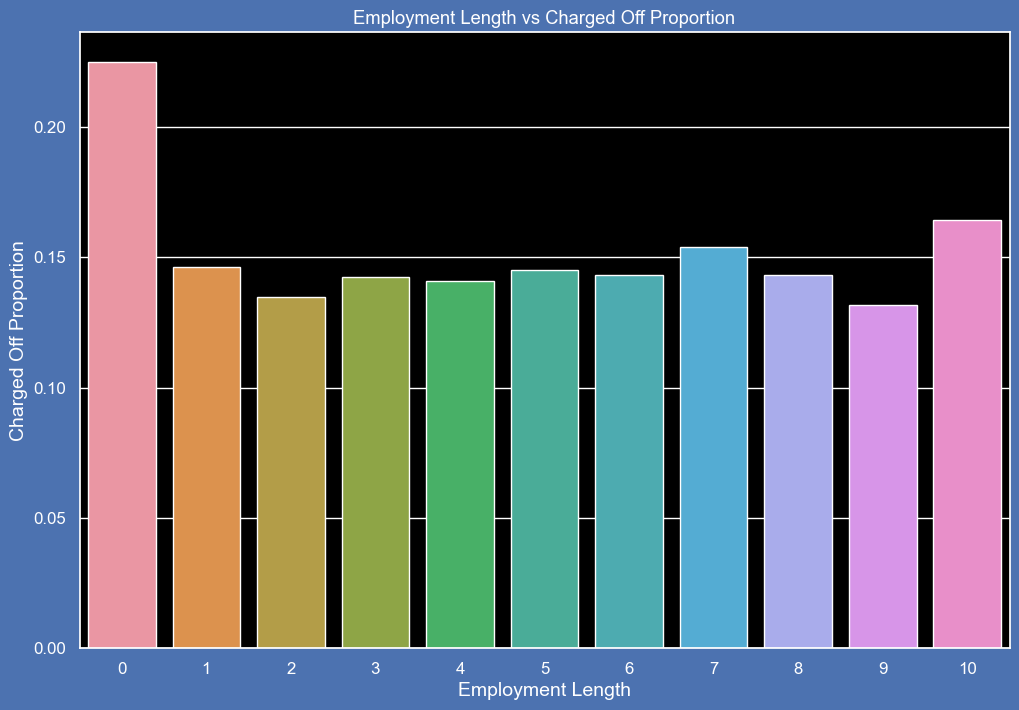

In [214]:
#Create Bar chart with above variable

with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(12,8),facecolor='b')
  ax1.set(title='Employment Length vs Charged Off Proportion')
  ax1=sns.barplot(x='emp_length',y='ChargedOff_Proportion',data=emplen_vs_loan)
  ax1.set_xlabel('Employment Length',fontsize=14,color='w')
  ax1.set_ylabel('Charged Off Proportion',fontsize=14,color='w')
  plt.show()

Observations -
Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
It makes sense as with less or no experience they don't have source of income to repay loan.
Rest of the applicants have more or less same chnaces of getting charged off.

In [215]:
#Bivariate Analysis on address state against ChargedOff Proportion
state_vs_loan = loan_dataset.groupby(['addr_state','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['Total'] = state_vs_loan['Charged Off'] + state_vs_loan['Fully Paid']
state_vs_loan['ChargedOff_Proportion'] = state_vs_loan['Charged Off']/state_vs_loan['Total']
state_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,ChargedOff_Proportion
28,NE,3.0,2.0,5.0,0.600000
32,NV,98.0,337.0,435.0,0.225287
13,ID,1.0,4.0,5.0,0.200000
0,AK,13.0,54.0,67.0,0.194030
40,SD,12.0,50.0,62.0,0.193548
9,FL,469.0,2093.0,2562.0,0.183060
11,HI,27.0,126.0,153.0,0.176471
31,NM,30.0,143.0,173.0,0.173410
24,MO,110.0,528.0,638.0,0.172414
4,CA,1022.0,5103.0,6125.0,0.166857


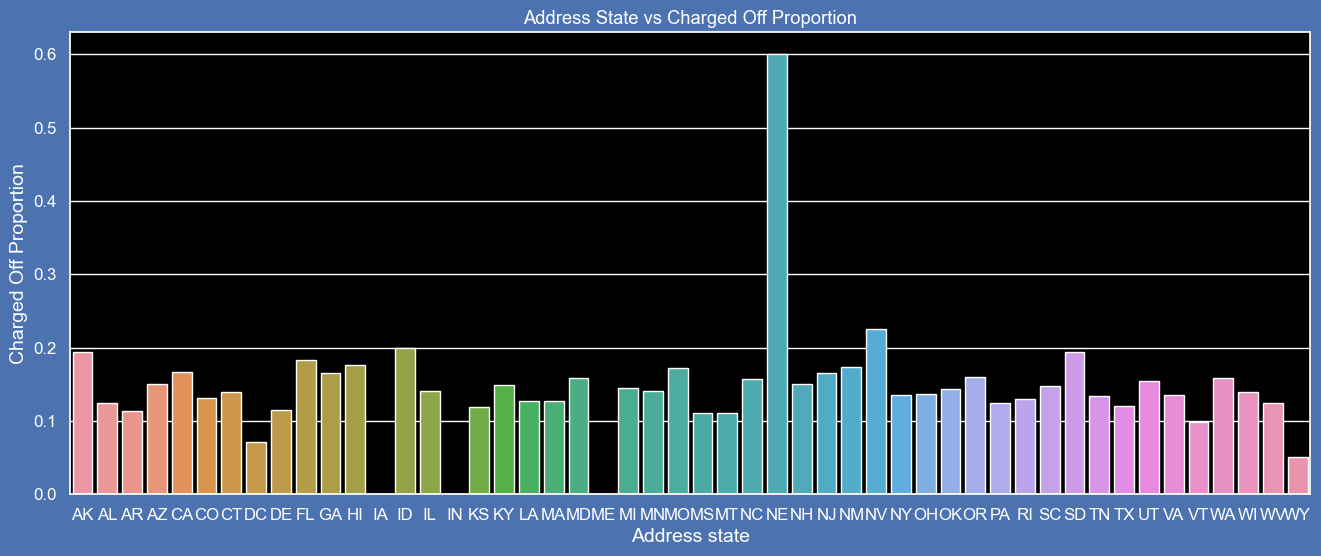

In [216]:
#Creating Charts from above analysis

with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(16,6),facecolor='b')
  ax1.set(title='Address State vs Charged Off Proportion')
  ax1=sns.barplot(x='addr_state',y='ChargedOff_Proportion',data=state_vs_loan)
  ax1.set_xlabel('Address state',fontsize=14,color='w')
  ax1.set_ylabel('Charged Off Proportion',fontsize=14,color='w')

Observations -
States NE has very high chances of charged off but number of applications are too low to make any decisions.
States NV,CA and FL states shows good number of charged offs in good number of applications.

In [217]:
#Bivariate analysis of verification status against Charged Off Proportion
verify_vs_loan = loan_dataset.groupby(['verification_status','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verify_vs_loan['Total'] = verify_vs_loan['Charged Off']+verify_vs_loan['Fully Paid']
verify_vs_loan['ChargedOff_Proportion'] = verify_vs_loan['Charged Off']+verify_vs_loan['Total']
verify_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,verification_status,Charged Off,Fully Paid,Total,ChargedOff_Proportion
0,Not Verified,2042,13705,15747,17789
2,Verified,1835,8503,10338,12173
1,Source Verified,1328,7381,8709,10037


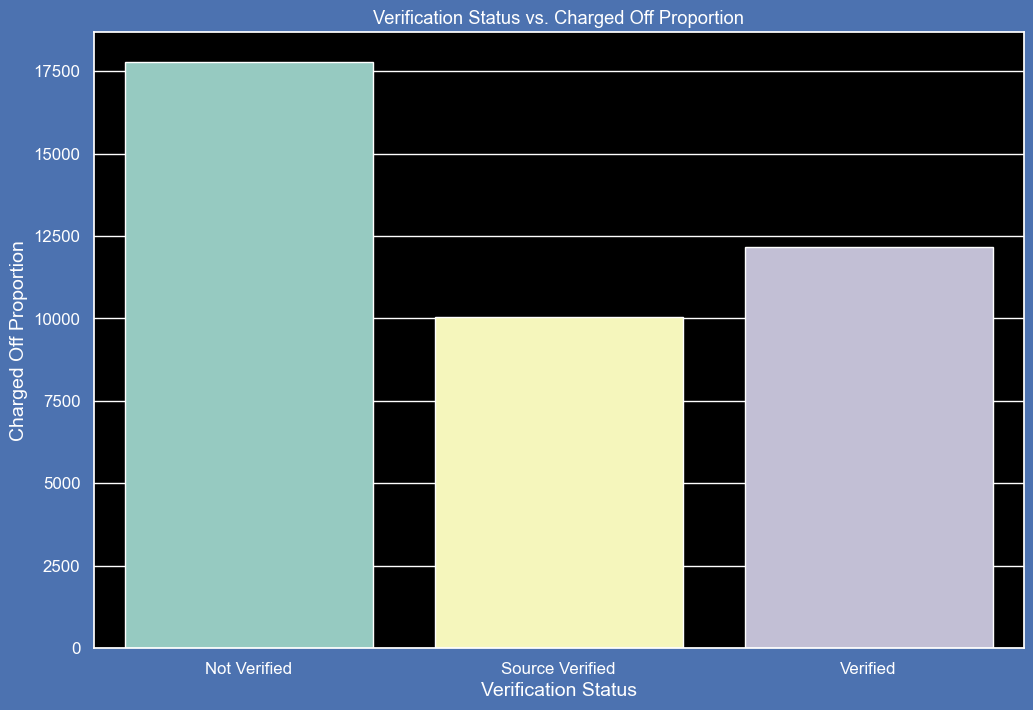

In [218]:
#Creating bar Plot for above Cases

with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(12,8),facecolor='b')
  ax1.set_title('Verification Status vs. Charged Off Proportion')
  ax1=sns.barplot(x='verification_status',y='ChargedOff_Proportion',data=verify_vs_loan)
  ax1.set_xlabel('Verification Status',fontsize=14,color='w')
  ax1.set_ylabel('Charged Off Proportion',fontsize=14,color='w')
  plt.show()

Observations -
As there is not much difference in Charged off proportions, the variable doesn't provide any insight on Charged Off Proportion

In [219]:
#Bivariate analysis on pub_rec_bankruptcies against ChargedOff Proportion
bankruptcies_vs_loan = loan_dataset.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total'] = bankruptcies_vs_loan['Charged Off'] + bankruptcies_vs_loan['Fully Paid']
bankruptcies_vs_loan['ChargedOff_Proportion'] = bankruptcies_vs_loan['Charged Off']/bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('ChargedOff_Proportion', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,ChargedOff_Proportion
2,2.0,2,3,5,0.400000
1,1.0,346,1194,1540,0.224675
3,Not Known,106,522,628,0.168790
0,0.0,4751,27870,32621,0.145642


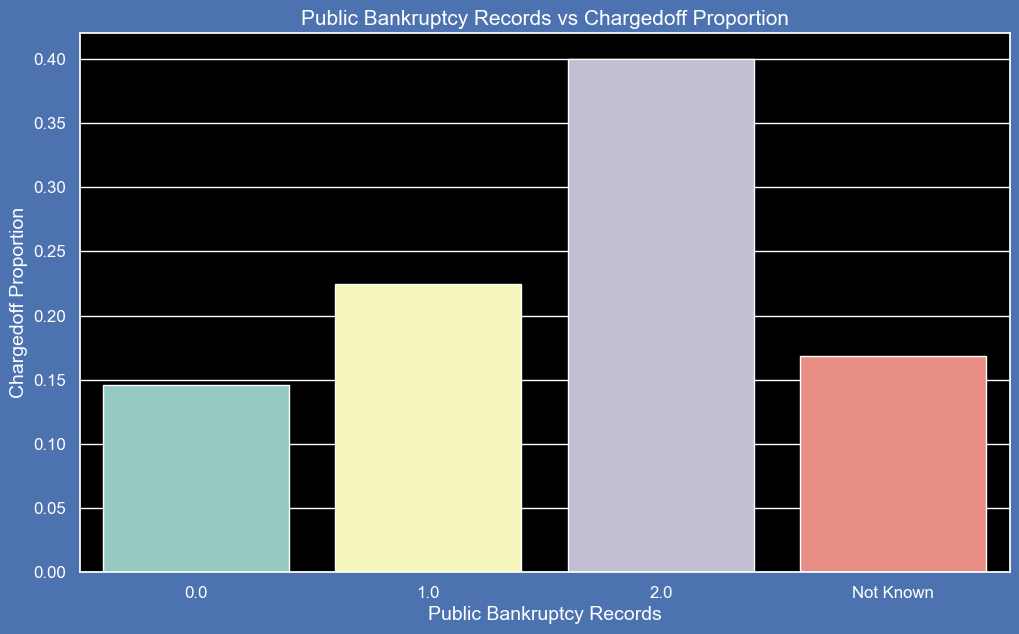

In [220]:
#Creating bar Plots for above Variables

with plt.style.context('dark_background'):
  fig,ax1=plt.subplots(figsize=(12,7),facecolor='b')
  ax1.set_title('Public Bankruptcy Records vs Chargedoff Proportion',fontsize=15,color='w')
  ax1=sns.barplot(x='pub_rec_bankruptcies',y='ChargedOff_Proportion',data=bankruptcies_vs_loan)
  ax1.set_xlabel('Public Bankruptcy Records',fontsize=14,color='w')
  ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')

Observations -
Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
Not known is the column for which we don't have any information about borrower.
This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

# Summarizing:

The Lending club case EDA is completed here.

Steps followed -
1. Study of the data - data understanding
2. Finding Level of data
3. Finding data quality issues and treating them
4. Outlier check and treatment
5. Data Analysis - Univariate Analysis
6. Binning and using binning to carry out sections in Bivariate analysis